In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import shuffle
from math import floor

In [2]:
#image_dir = '/mnt/RAW/FILES/SYNAPSE/POC/UDACITY/PRODUCT_IMAGES_CLASSIFIER/'
image_dir = '/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/'
train_split = .8

image_dir_dbfs = '/dbfs' + image_dir
image_dir_train = image_dir + 'TRAIN/'
image_dir_test = image_dir + 'TEST/'
image_dir_valid = image_dir + 'VALID/'

In [3]:
image_counter = dict()
path, dirs, files = next(os.walk(image_dir))

for dir in dirs:
  file_list = os.listdir(image_dir + dir) # dir is your directory path
  number_files = len(file_list)
  image_counter[dir] = number_files

In [4]:
#df_photo_counter = pd.DataFrame(image_counter.items(), columns=['Item #', 'Image Counter'])
df_photo_counter = pd.DataFrame.from_dict(image_counter, orient='index', dtype='str')
df_photo_counter.columns = ['Count']
df_photo_counter = df_photo_counter.astype({'Count': 'int32'})
df_photo_counter.sort_values(by='Count', ascending=True, na_position='first')
df_photo_counter

,Count
10193256,148
10193236,213
10176763,135
10119956,157
10193264,48
10119418,71
10176725,4
10168008,40
10176807,255
10129365,148


In [5]:
print('Average Number of Photos by Item: {}'.format(df_photo_counter.mean(axis = 0)[0]))

Average Number of Photos by Item: 220.42857142857142

In [6]:
df_photo_counter_100_1000 = df_photo_counter[df_photo_counter.Count > 100]
df_photo_counter_100_1000 = df_photo_counter_100_1000[df_photo_counter_100_1000.Count < 1000]

In [7]:
df_photo_counter_100_1000

,Count
10193256,148
10193236,213
10176763,135
10119956,157
10176807,255
10129365,148
10197127,258
10137240,124
10197128,229
10142637,201


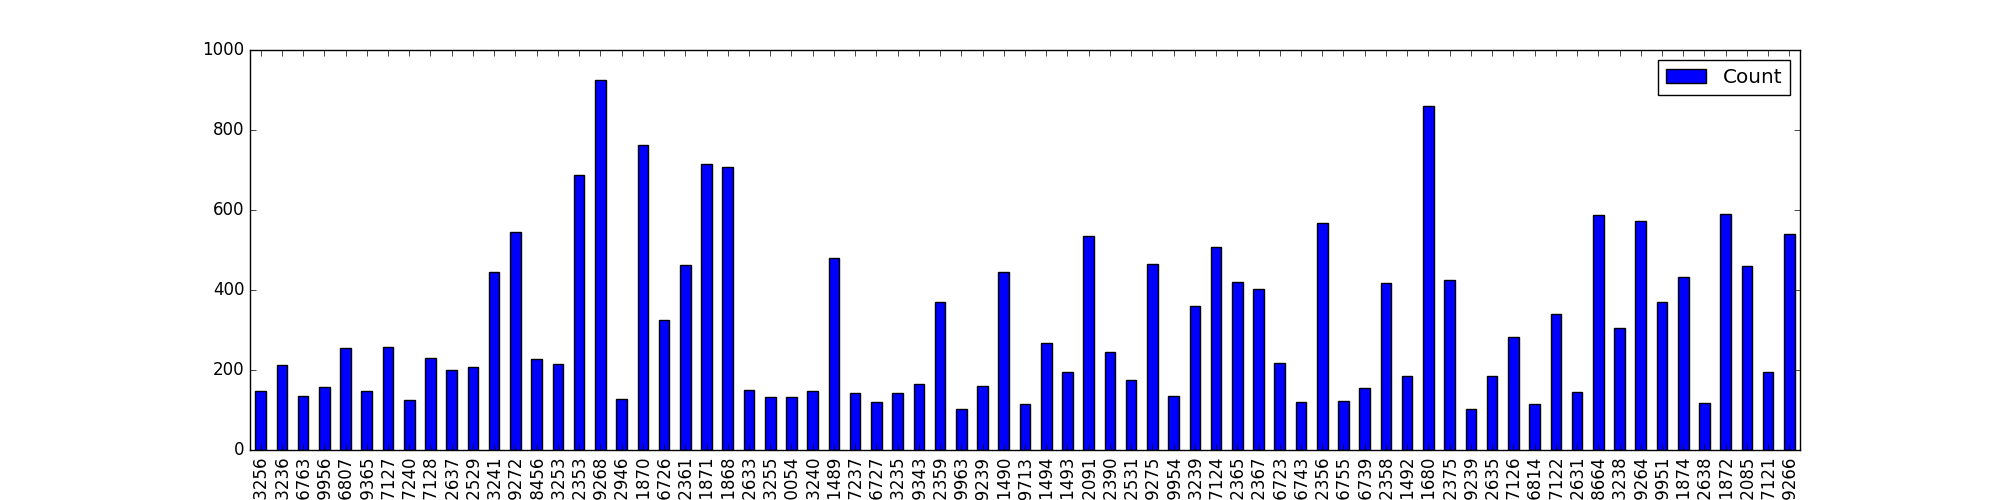

In [8]:
ax = df_photo_counter_100_1000.reset_index().plot.bar(x='index', y='Count', rot=90, figsize=(20, 5))
display(ax.figure)

In [9]:
#For Local Storage:
import shutil

for index, row in df_photo_counter.iterrows():
  if ( row['Count'] < 100 ) or ( row['Count'] > 999 ):
    path_to_delete = os.path.join(image_dir, index)
    print(path_to_delete)
    #dbutils.fs.rm(path_to_delete, True)
    shutil.rmtree(path_to_delete)

/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10193264
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10119418
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176725
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10168008
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129376
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191328
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1011941
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129397
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1019209
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1019712
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176762
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191677
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10167964
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1020294
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129345
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10193237
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191435
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129362
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1019237
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191439
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191692
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10142542
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176817
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191333
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191215
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10167999
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176759
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1019236
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10167996
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10193265
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191422
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129373
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176761
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191335
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176754
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10119081
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10197129
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10202944
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1019325
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129349
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176756
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176760
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10193263
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1019208
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176818
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10197123
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129393
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10168002
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/WHISKA
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10192088
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129366
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1014263
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191433
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191445
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10120052
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10167970
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10192394
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10193260
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129379
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10137226
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10119961
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10118455
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1013724
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191686
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10193259
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10191326
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10202950
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10176815
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10192398
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10192396
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10129375
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/1012934
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10118457
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10137238
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10168005
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10192154
/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/10142643
/local_di

In [10]:
#For Data Lake:
#dbutils.fs.rm(image_dir_train, True)
#dbutils.fs.rm(image_dir_test, True)
#dbutils.fs.rm(image_dir_valid, True)

#dbutils.fs.mkdirs(image_dir_train)
#dbutils.fs.mkdirs(image_dir_test)
#dbutils.fs.mkdirs(image_dir_valid)

#For Local Storage:
if os.path.exists(image_dir_train) and os.path.isdir(image_dir_train):
  shutil.rmtree(image_dir_train)
  
if os.path.exists(image_dir_test) and os.path.isdir(image_dir_test):
  shutil.rmtree(image_dir_test)

if os.path.exists(image_dir_valid) and os.path.isdir(image_dir_valid):
  shutil.rmtree(image_dir_valid)

os.mkdir(image_dir_train)
os.mkdir(image_dir_test)
os.mkdir(image_dir_valid)

In [11]:
image_counter = dict()
#path, dirs, files = next(os.walk(image_dir_dbfs))
path, dirs, files = next(os.walk(image_dir))

for dir in dirs:
  dir = str(dir)
  if dir.lower() != 'train' and dir.lower() != 'test' and dir.lower() != 'valid':
    print('--')
    print('Directory: {}'.format(dir))
    #file_list = os.listdir(image_dir_dbfs + dir)
    file_list = os.listdir(image_dir + dir)
    shuffle(file_list) #randomize list of files
    
    split_index_train = floor(len(file_list) * train_split)

    training_file_list = file_list[:split_index_train]
    testing_and_validation_file_list = file_list[split_index_train:]
    
    split_index_test = floor(len(testing_and_validation_file_list) * 0.5)
    testing_file_list = testing_and_validation_file_list[split_index_test:]
    validation_file_list = testing_and_validation_file_list[:split_index_test]

    print('# of TRAIN: {}'.format(len(training_file_list)))
    print('# of TEST: {}'.format(len(testing_file_list)))
    print('# of VALID {}'.format(len(validation_file_list)))
    print('Total # of FILES: {}'.format(len(file_list)))
    
    #copy files to TRAIN
    #dbutils.fs.mkdirs(image_dir_train + dir)
    os.mkdir(image_dir_train + dir)
    for train_file in training_file_list:
      #dbutils.fs.cp(os.path.join(image_dir, dir, train_file), os.path.join(image_dir_train, dir, train_file))
      shutil.copy(os.path.join(image_dir, dir, train_file), os.path.join(image_dir_train, dir, train_file))
    
    #copy file to TEST
    #dbutils.fs.mkdirs(image_dir_test + dir)
    os.mkdir(image_dir_test + dir)
    for test_file in testing_file_list:
      #dbutils.fs.cp(os.path.join(image_dir, dir, test_file), os.path.join(image_dir_test, dir, test_file))
      shutil.copy(os.path.join(image_dir, dir, test_file), os.path.join(image_dir_test, dir, test_file))
    
    #copy files to VALID
    dbutils.fs.mkdirs(image_dir_valid + dir)
    os.mkdir(image_dir_valid + dir)
    for valid_file in validation_file_list:
      #dbutils.fs.cp(os.path.join(image_dir, dir, valid_file), os.path.join(image_dir_valid, dir, valid_file))
      shutil.copy(os.path.join(image_dir, dir, valid_file), os.path.join(image_dir_valid, dir, valid_file))
    

--
Directory: 10119963
# of TRAIN: 81
# of TEST: 11
# of VALID 10
Total # of FILES: 102
--
Directory: 10192353
# of TRAIN: 550
# of TEST: 69
# of VALID 69
Total # of FILES: 688
--
Directory: 10192365
# of TRAIN: 336
# of TEST: 43
# of VALID 42
Total # of FILES: 421
--
Directory: 10193236
# of TRAIN: 170
# of TEST: 22
# of VALID 21
Total # of FILES: 213
--
Directory: 10193240
# of TRAIN: 118
# of TEST: 15
# of VALID 15
Total # of FILES: 148
--
Directory: 10176814
# of TRAIN: 91
# of TEST: 12
# of VALID 11
Total # of FILES: 114
--
Directory: 10121868
# of TRAIN: 566
# of TEST: 71
# of VALID 71
Total # of FILES: 708
--
Directory: 10176726
# of TRAIN: 259
# of TEST: 33
# of VALID 32
Total # of FILES: 324
--
Directory: 10197121
# of TRAIN: 156
# of TEST: 20
# of VALID 19
Total # of FILES: 195
--
Directory: 10193239
# of TRAIN: 288
# of TEST: 37
# of VALID 36
Total # of FILES: 361
--
Directory: 10176739
# of TRAIN: 124
# of TEST: 16
# of VALID 16
Total # of FILES: 156
--
Directory: 10137237
# of TRAIN: 114
# of TEST: 15
# of VALID 14
Total # of FILES: 143
--
Directory: 10193255
# of TRAIN: 106
# of TEST: 14
# of VALID 13
Total # of FILES: 133
--
Directory: 1019713
# of TRAIN: 91
# of TEST: 12
# of VALID 11
Total # of FILES: 114
--
Directory: 10197126
# of TRAIN: 225
# of TEST: 29
# of VALID 28
Total # of FILES: 282
--
Directory: 10119954
# of TRAIN: 108
# of TEST: 14
# of VALID 13
Total # of FILES: 135
--
Directory: 10193253
# of TRAIN: 172
# of TEST: 22
# of VALID 22
Total # of FILES: 216
--
Directory: 10141489
# of TRAIN: 384
# of TEST: 48
# of VALID 48
Total # of FILES: 480
--
Directory: 10176727
# of TRAIN: 96
# of TEST: 12
# of VALID 12
Total # of FILES: 120
--
Directory: 10172358
# of TRAIN: 334
# of TEST: 42
# of VALID 42
Total # of FILES: 418
--
Directory: 10142529
# of TRAIN: 166
# of TEST: 21
# of VALID 21
Total # of FILES: 208
--
Directory: 10129365
# of TRAIN: 118
# of TEST: 15
# of VALID 15
Total # of FILES: 148
--
Directory: 10121871
# of TRAIN: 572
# of TEST: 72
# of VALID 71
Total # of FILES: 715
--
Directory: 10142631
# of TRAIN: 116
# of TEST: 15
# of VALID 15
Total # of FILES: 146
--
Directory: 10142531
# of TRAIN: 140
# of TEST: 18
# of VALID 18
Total # of FILES: 176
--
Directory: 10197128
# of TRAIN: 183
# of TEST: 23
# of VALID 23
Total # of FILES: 229
--
Directory: 10176763
# of TRAIN: 108
# of TEST: 14
# of VALID 13
Total # of FILES: 135
--
Directory: 10193238
# of TRAIN: 244
# of TEST: 31
# of VALID 30
Total # of FILES: 305
--
Directory: 10142635
# of TRAIN: 148
# of TEST: 19
# of VALID 19
Total # of FILES: 186
--
Directory: 10121874
# of TRAIN: 345
# of TEST: 44
# of VALID 43
Total # of FILES: 432
--
Directory: 10119956
# of TRAIN: 125
# of TEST: 16
# of VALID 16
Total # of FILES: 157
--
Directory: 10142637
# of TRAIN: 160
# of TEST: 21
# of VALID 20
Total # of FILES: 201
--
Directory: 10109268
# of TRAIN: 740
# of TEST: 93
# of VALID 93
Total # of FILES: 926
--
Directory: 10197122
# of TRAIN: 271
# of TEST: 34
# of VALID 34
Total # of FILES: 339
--
Directory: 10191680
# of TRAIN: 688
# of TEST: 87
# of VALID 86
Total # of FILES: 861
--
Directory: 10109272
# of TRAIN: 436
# of TEST: 55
# of VALID 54
Total # of FILES: 545
--
Directory: 10192085
# of TRAIN: 368
# of TEST: 47
# of VALID 46
Total # of FILES: 461
--
Directory: 10109275
# of TRAIN: 372
# of TEST: 47
# of VALID 47
Total # of FILES: 466
--
Directory: 10142633
# of TRAIN: 119
# of TEST: 15
# of VALID 15
Total # of FILES: 149
--
Directory: 10176723
# of TRAIN: 173
# of TEST: 22
# of VALID 22
Total # of FILES: 217
--
Directory: 10141492
# of TRAIN: 148
# of TEST: 19
# of VALID 18
Total # of FILES: 185
--
Directory: 10141493
# of TRAIN: 156
# of TEST: 20
# of VALID 20
Total # of FILES: 196
--
Directory: 10137240
# of TRAIN: 99
# of TEST: 13
# of VALID 12
Total # of FILES: 124
--
Directory: 10192091
# of TRAIN: 428
# of TEST: 54
# of VALID 54
Total # of FILES: 536
--
Directory: 10192390
# of TRAIN: 195
# of TEST: 25
# of VALID 24
Total # of FILES: 244
-

In [12]:
%sh
###COMPRESS ALL FOLDERS & COPY TO DATA LAKE
pushd /local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER/
zip -r /local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER_DATA_SPLIT.ZIP TRAIN/
zip -r /local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER_DATA_SPLIT.ZIP TEST/
zip -r /local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER_DATA_SPLIT.ZIP VALID/
cp /local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER_DATA_SPLIT.ZIP /dbfs/mnt/RAW/FILES/SYNAPSE/POC/UDACITY/PRODUCT_IMAGES_CLASSIFIER/PRODUCT_IMAGES_CLASSIFIER_DATA_SPLIT.ZIP
popd

/local_disk0/tmp/PRODUCT_IMAGES_CLASSIFIER /databricks/driver
 adding: TRAIN/ (stored 0%)
 adding: TRAIN/10119963/ (stored 0%)
 adding: TRAIN/10119963/59.jpg (deflated 0%)
 adding: TRAIN/10119963/95.jpg (deflated 1%)
 adding: TRAIN/10119963/80.jpg (deflated 1%)
 adding: TRAIN/10119963/8.jpg (deflated 1%)
 adding: TRAIN/10119963/16.jpg (deflated 2%)
 adding: TRAIN/10119963/73.jpg (deflated 2%)
 adding: TRAIN/10119963/72.jpg (deflated 3%)
 adding: TRAIN/10119963/55.jpg (deflated 2%)
 adding: TRAIN/10119963/14.jpg (deflated 2%)
 adding: TRAIN/10119963/22.jpg (deflated 1%)
 adding: TRAIN/10119963/15.jpg (deflated 1%)
 adding: TRAIN/10119963/79.jpg (deflated 1%)
 adding: TRAIN/10119963/61.jpg (deflated 1%)
 adding: TRAIN/10119963/60.jpg (deflated 1%)
 adding: TRAIN/10119963/32.jpg (deflated 1%)
 adding: TRAIN/10119963/18.jpg (deflated 1%)
 adding: TRAIN/10119963/85.jpg (deflated 3%)
 adding: TRAIN/10119963/84.jpg (deflated 2%)
 adding: TRAIN/10119963/53.jpg (deflated 1%)
 adding: TRAIN/10119963/20.jpg (deflated 1%)
 adding: TRAIN/10119963/49.jpg (deflated 2%)
 adding: TRAIN/10119963/5.jpg (deflated 1%)
 adding: TRAIN/10119963/25.jpg (deflated 1%)
 adding: TRAIN/10119963/58.jpg (deflated 1%)
 adding: TRAIN/10119963/21.jpg (deflated 1%)
 adding: TRAIN/10119963/64.jpg (deflated 1%)
 adding: TRAIN/10119963/41.jpg (deflated 2%)
 adding: TRAIN/10119963/33.jpg (deflated 1%)
 adding: TRAIN/10119963/45.jpg (deflated 1%)
 adding: TRAIN/10119963/78.jpg (deflated 1%)
 adding: TRAIN/10119963/87.jpg (deflated 3%)
 adding: TRAIN/10119963/50.jpg (deflated 1%)
 adding: TRAIN/10119963/43.jpg (deflated 2%)
 adding: TRAIN/10119963/100.jpg (deflated 1%)
 adding: TRAIN/10119963/40.jpg (deflated 2%)
 adding: TRAIN/10119963/44.jpg (deflated 2%)
 adding: TRAIN/10119963/38.jpg (deflated 1%)
 adding: TRAIN/10119963/94.jpg (deflated 1%)
 adding: TRAIN/10119963/24.jpg (deflated 1%)
 adding: TRAIN/10119963/93.jpg (deflated 1%)
 adding: TRAIN/10119963/30.jpg (deflated 1%)
 adding: TRAIN/10119963/31.jpg (deflated 1%)
 adding: TRAIN/10119963/48.jpg (deflated 2%)
 adding: TRAIN/10119963/74.jpg (deflated 1%)
 adding: TRAIN/10119963/98.jpg (deflated 1%)
 adding: TRAIN/10119963/63.jpg (deflated 1%)
 adding: TRAIN/10119963/35.jpg (deflated 1%)
 adding: TRAIN/10119963/68.jpg (deflated 1%)
 adding: TRAIN/10119963/77.jpg (deflated 1%)
 adding: TRAIN/10119963/69.jpg (deflated 1%)
 adding: TRAIN/10119963/10.jpg (deflated 2%)
 adding: TRAIN/10119963/29.jpg (deflated 1%)
 adding: TRAIN/10119963/39.jpg (deflated 1%)
 adding: TRAIN/10119963/91.jpg (deflated 1%)
 adding: TRAIN/10119963/47.jpg (deflated 2%)
 adding: TRAIN/10119963/9.jpg (deflated 2%)
 adding: TRAIN/10119963/71.jpg (deflated 2%)
 adding: TRAIN/10119963/75.jpg (deflated 1%)
 adding: TRAIN/10119963/7.jpg (deflated 1%)
 adding: TRAIN/10119963/76.jpg (deflated 1%)
 adding: TRAIN/10119963/51.jpg (deflated 1%)
 adding: TRAIN/10119963/34.jpg (deflated 1%)
 adding: TRAIN/10119963/92.jpg (deflated 1%)
 adding: TRAIN/10119963/37.jpg (deflated 1%)
 adding: TRAIN/10119963/36.jpg (deflated 1%)
 adding: TRAIN/10119963/65.jpg (deflated 1%)
 adding: TRAIN/10119963/1.jpg (deflated 1%)
 adding: TRAIN/10119963/82.jpg (deflated 1%)
 adding: TRAIN/10119963/42.jpg (deflated 2%)
 adding: TRAIN/10119963/101.jpg (deflated 1%)
 adding: TRAIN/10119963/57.jpg (deflated 1%)
 adding: TRAIN/10119963/3.jpg (deflated 1%)
 adding: TRAIN/10119963/97.jpg (deflated 1%)
 adding: TRAIN/10119963/66.jpg (deflated 0%)
 adding: TRAIN/10119963/89.jpg (deflated 1%)
 adding: TRAIN/10119963/70.jpg (deflated 1%)
 adding: TRAIN/10119963/13.jpg (deflated 2%)
 adding: TRAIN/10119963/11.jpg (deflated 2%)
 adding: TRAIN/10119963/56.jpg (deflated 1%)
 adding: TRAIN/10119963/6.jpg (deflated 1%)
 adding: TRAIN/10119963/90.jpg (deflated 1%)
 adding: TRAIN/10192353/ (stored 0%)
 adding: TRAIN/10192353/627.jpg (deflated 1%)
 adding: TRAIN/10192353/333.jpg (deflated 1%)
 adding: TRAIN/10192353/250.jpg (deflated 1%)
 adding: TRAIN/10192353/508.jpg (deflated 8%)
 adding: TRA